# Holt's Method
Learn how to make time series forecasts on random stock close price data using [Holt's Method](https://www.statsmodels.org/stable/examples/notebooks/generated/exponential_smoothing.html#Holt's-Method)


## Step One:
Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import Holt

## Step Two:  Convert data to a DataFrame 

Convert data from one of the following sources:

- InfluxDB 

- CSV


### To convert from InfluxDB
Use the Python InfluxDB Client to query data and return it as a Panda DataFrame. For more information, [Getting Started with InfluxDB and Pandas](../Getting_Started_with_InfluxDB_and_Pandas.ipynb). Then continue to Step 3.

### To convert from CSV
Run the following code to convert csv data to a series:

In [2]:
close_data = pd.read_csv("sample_data/close_data.csv", index_col=False)
close_data.head()

,time,close
0,2000-01-01,968.29
1,2000-01-02,968.70
2,2000-01-03,968.43
3,2000-01-04,967.21
4,2000-01-05,966.97


## Step Three: Prepare Data

To prepare the DataFrame to be consumed by the Holt function, run the following code to do the following:

- Set the time column as the index
- Specify the frequency 
- Convert DataFrame to a series with a timestamp index and a time frequency

In [3]:
close_data = close_data.set_index("time")
close_data = close_data.asfreq(freq='D')
s = close_data.iloc[:,0]
s[0:3]

time
2000-01-01    968.29
2000-01-02    968.70
2000-01-03    968.43
Freq: D, Name: close, dtype: float64

## Step Three: Apply Holt

Use the Holt function to fit the data. Specify the type of trend component. In this example we are using the addative verstion of Holt with a dampen parameter. 

In [4]:
fit = Holt(s,damped_trend=True,initialization_method="estimated").fit(optimized=True)
fcast = fit.forecast(10).rename("Multiplicative damped trend")

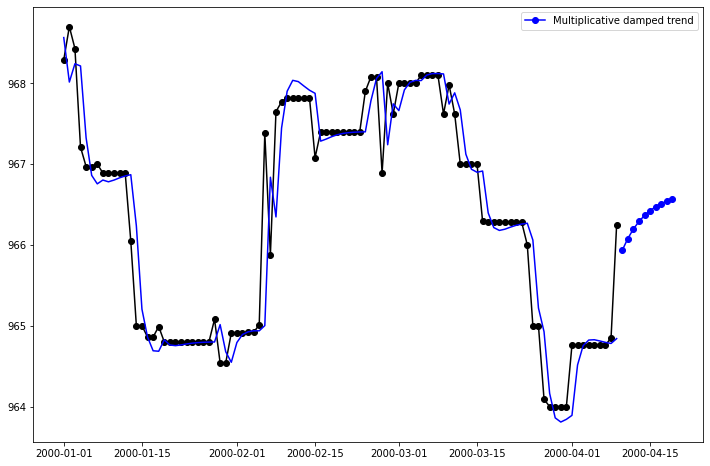

In [5]:
plt.figure(figsize=(12, 8))
plt.plot(close_data["close"], marker='o', color='black')
plt.plot(fit.fittedvalues, color='blue')
line1, = plt.plot(fcast, marker='o', color='blue')
plt.legend([line1], [fcast.name])

## Using the Telegraf Execd processor plugin
[Machine Learning with the Telegraf Execd processor plugin](https://github.com/influxdata/tg-brew-anomaly) contains the code needed to continuously generate predictions using Holt's method with each new time series point with InfluxDB. 